In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf



In [20]:
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start=start, end=end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [21]:
import yfinance as yf
import numpy as np
import pandas as pd

def get_data(stocks, start, end):
    data = yf.download(stocks, start=start, end=end, progress=False)["Close"] # Changed to 'Close'
    returns = data.pct_change().dropna()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix
stockList = ['NVDA', 'PLTR', 'TSLA', 'META', 'AMD']
stocks = stockList # Changed to use the original stockList for US tickers
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
meanReturns, covMatrix = get_data(stocks, startDate, endDate)

print(meanReturns)

/tmp/ipython-input-2688813907.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start, end=end, progress=False)["Close"] # Changed to 'Close'


Ticker
AMD     0.004480
META    0.000324
NVDA    0.002389
PLTR    0.004753
TSLA    0.003262
dtype: float64


In [22]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)


[0.13315581 0.19941542 0.13065272 0.27788599 0.25889006]


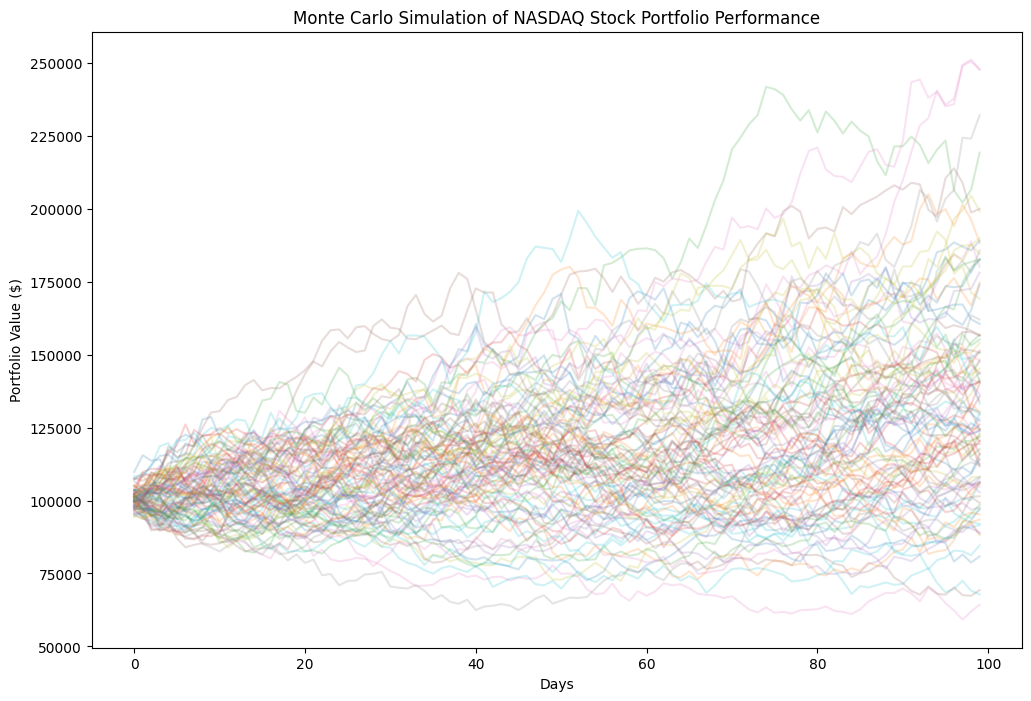

<Figure size 640x480 with 0 Axes>

In [28]:
mc_sims = 100 #no. of simulations
T = 100 #Time frame in days
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

intialPortfolio = 10000000
initial_investment = 100000

plt.figure(figsize=(12,8)) # Create figure once outside the loop

for m in range(0, mc_sims):
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = initial_investment * np.cumprod(np.inner(weights, dailyReturns.T)+1)

    plt.plot(portfolio_sims[:,m], alpha=0.2) # Plot each simulation on the same figure

plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('Monte Carlo Simulation of NASDAQ Stock Portfolio Performance')
plt.show()
plt.savefig('nasdaq_portfolio.png')

<Figure size 640x480 with 0 Axes>